# Problem statement
### Adult Salary Prediction

 Our task is to analyze the dataset and predict whether the income of an adult will exceed 50k per year or not.
 * We have been given 14 features.
 
 Adult dataset link : http://archive.ics.uci.edu/ml/datasets/Adult

In [53]:
import numpy as np # mathematical calculation
import pandas as pd  # data preprocessing 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns  # data visualization

In [54]:
df = pd.read_excel('AdultData.xlsx')
df.head(5)

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,Sex,Unnamed: 10,Unnamed: 11,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [55]:
df.columns

Index(['Age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Sex',
       'Unnamed: 10', 'Unnamed: 11', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [56]:
len(df.columns)

15

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Unnamed: 10     32561 non-null  int64 
 11  Unnamed: 11     32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [58]:
df.shape

(32561, 15)

In [59]:
df.describe()

,Age,fnlwgt,education-num,Unnamed: 10,Unnamed: 11,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


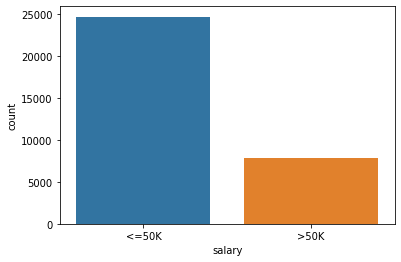

In [60]:
sns.countplot(x='salary',data=df )

In [61]:
df["salary"].value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [62]:
print(f"<= 50k : {round(24720 /32561 * 100 , 2)}")
print(f"> 50k : {round(7841 /32561 * 100 , 2)}")

<= 50k : 75.92
> 50k : 24.08


## Exploratory data analysis and Feature Engineering

In [63]:
## Here we will check the missing values in our dataset
df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
Sex               0
Unnamed: 10       0
Unnamed: 11       0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [64]:
numerical = [i for i in df.columns if df[i].dtypes != "O"]

In [65]:
numerical

['Age',
 'fnlwgt',
 'education-num',
 'Unnamed: 10',
 'Unnamed: 11',
 'hours-per-week']

In [66]:
for i in numerical:
    print(f" {i}  :  {len(df[i].unique())}")

 Age  :  73
 fnlwgt  :  21648
 education-num  :  16
 Unnamed: 10  :  119
 Unnamed: 11  :  92
 hours-per-week  :  94


In [67]:
df["education-num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


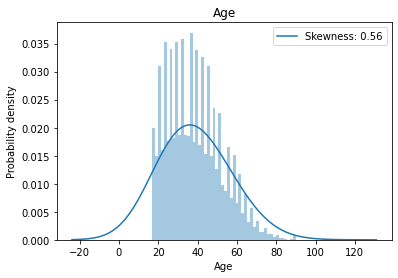

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


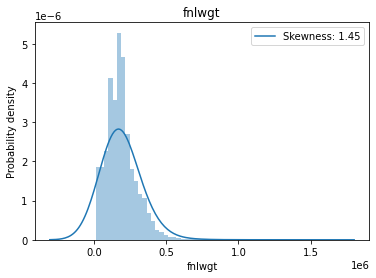

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


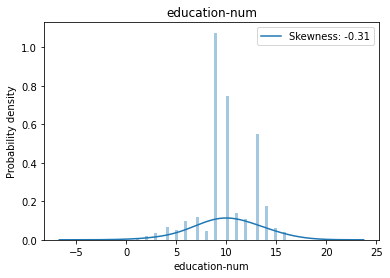

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


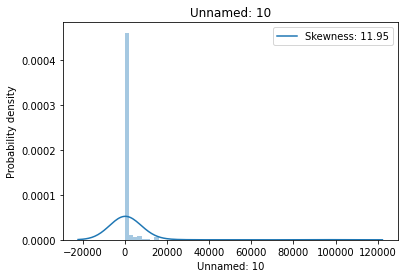

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


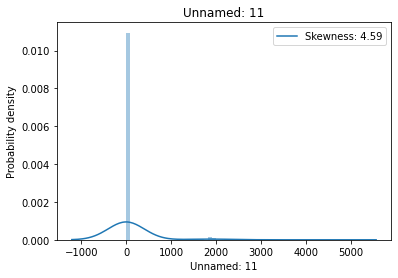

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


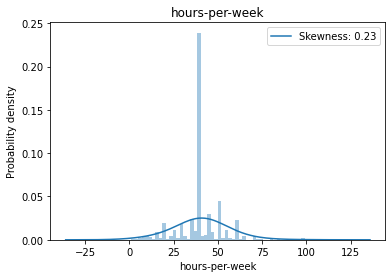

In [68]:
for feature in numerical:
    bar = sns.distplot(df[feature] , kde_kws = {'bw' : 1})
    bar.legend(["Skewness: {:0.2f}".format(df[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel("Probability density")
    plt.title(feature)
    plt.show()

In [69]:
df["Age"] = np.log(df["Age"])
df["fnlwgt"] = np.log(df["fnlwgt"])

In [70]:
df.columns

Index(['Age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Sex',
       'Unnamed: 10', 'Unnamed: 11', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

## Handling categorical data 

In [71]:
categorical = [i for i in df.columns if df[i].dtypes == "O"]

In [72]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  9
 education  :  16
 marital-status  :  7
 occupation  :  15
 relationship  :  6
 race  :  5
 Sex  :  2
 native-country  :  42
 salary  :  2


In [73]:
for feature in  categorical:
    print(df[feature].value_counts()) 
    print("\n \n ")

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

 
 
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

 
 
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

 
 
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-cleri

## Handling missing values in categorical features

In [74]:
print(f"workclass : {round(2093 / 32561 , 4) *100}%")
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native-country : {round(583 / 32561 , 4) *100}%")

workclass : 6.43%
occupation : 5.66%
native-country : 1.79%


In [76]:
df["occupation"].mode()[0]

'Prof-specialty'

**here we have less than 6 percent missing values so we can fill it with mode value**

In [79]:
df["workclass"] = df['workclass'].str.replace('?', 'Private' )
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' )
df['native-country'] = df['native-country'].str.replace('?', 'United-States' )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
# education Category
df["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df["education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

In [83]:
#martial status
df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)

In [85]:
# income
df["salary"] = df["salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

In [86]:
df.head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,Sex,Unnamed: 10,Unnamed: 11,hours-per-week,native-country,salary
0,3.663562,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,3.912023,Self-emp-not-inc,11.330336,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,3.637586,Private,12.281393,HS-grad,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3.970292,Private,12.366153,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,3.332205,Private,12.732011,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [87]:
for feature in categorical:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  8
 education  :  6
 marital-status  :  3
 occupation  :  14
 relationship  :  6
 race  :  5
 Sex  :  2
 native-country  :  41
 salary  :  2


In [88]:
df["education"].unique()

array(['Bachelors', 'HS-grad', 'school', 'Masters', 'higher', 'Doctorate'],
      dtype=object)

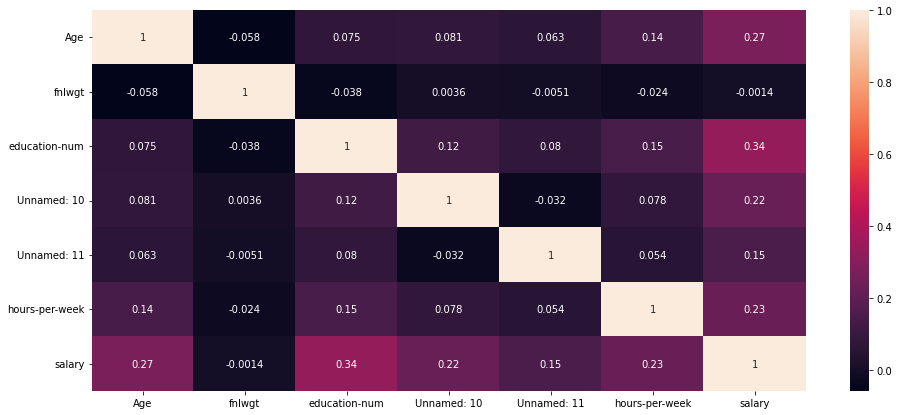

In [89]:
plt.figure(figsize = (16 , 7))
sns.heatmap(df.corr(), annot=True);

In [90]:
from sklearn.preprocessing import  LabelEncoder

In [91]:
df = df.apply(LabelEncoder().fit_transform)
df .head()

,Age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,Sex,Unnamed: 10,Unnamed: 11,hours-per-week,native-country,salary
0,22,6,2671,0,12,0,0,1,4,1,25,0,39,38,0
1,33,5,2926,0,12,1,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,5,6,1,5,0,2,1,0,0,39,38,0
4,11,3,19355,0,12,1,9,5,2,0,0,0,39,4,0


In [ ]:
#sns.pairplot(df ,  height=10 ) ## Multivariate analysis

In [92]:
X_train = df.iloc[:,:-1]
y_train = df["salary"]

## Feature engineering on test data

In [96]:
df_test = pd.read_csv("adult_test.csv")
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [97]:
## apply log on skewed data
df_test["age"] = np.log(df_test["age"])
df_test[" fnlwgt"] = np.log(df_test[" fnlwgt"])

## handling missing values in categorical variable
df_test[" workclass"] = df_test[' workclass'].str.replace('?', 'Private' )
df_test[' occupation'] = df_test[' occupation'].str.replace('?', 'Prof-specialty' )
df_test[' native-country'] = df_test[' native-country'].str.replace('?', 'United-States' )

# education Category
df_test[" education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df_test[" education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

#martial status
df_test[' marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df_test[' marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)


# income
df_test[" salary"] = df_test[" salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

df_test = df_test.apply(LabelEncoder().fit_transform)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [98]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,8,3,8931,5,6,0,6,3,2,1,0,0,39,37,0
1,21,3,1888,2,8,1,4,0,4,1,0,0,49,37,0
2,11,1,11540,4,11,1,10,0,4,1,0,0,39,37,1
3,27,3,5146,4,9,1,6,0,2,1,90,0,39,37,1
4,1,3,2450,4,9,0,9,3,4,0,0,0,29,37,0


In [99]:
df_test.shape

(16281, 15)

In [100]:
X_test = df_test.iloc[:,:-1]
y_test = df_test[" salary"]

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
-  capital-gain
-  capital-loss
-  education
-  education-num
-  fnlwgt
- ...
Feature names seen at fit time, yet now missing:
- Age
- Sex
- Unnamed: 10
- Unnamed: 11
- education
- ...

  warnings.warn(message, FutureWarning)


In [102]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
accuracy_score(y_test, prediction)

0.7670904735581352

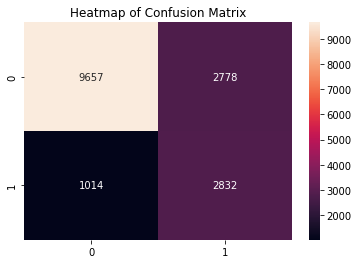

In [104]:
cm = confusion_matrix(y_test, prediction )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [105]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.78      0.84     12435
           1       0.50      0.74      0.60      3846

    accuracy                           0.77     16281
   macro avg       0.70      0.76      0.72     16281
weighted avg       0.81      0.77      0.78     16281



## Random Forest

In [106]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy' ,random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8474295190713101

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.74      0.55      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



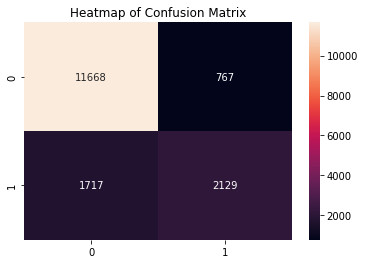

In [108]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

## Hyperparameter tuning  with random forest

In [109]:
params={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':[1,2,3],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf': [1,2,3,4],
              }

In [110]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3 ,random_state = 23)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                                    n_estimators=20,
                                                    random_state=51),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [1, 2, 3],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   random_state=23, scoring='roc_auc', verbose=3)

In [111]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 10,
 'criterion': 'entropy',
 'bootstrap': False}

In [112]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       max_features=3, min_samples_leaf=2, n_estimators=200,
                       random_state=51)

In [113]:
rf_classifier = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       criterion='entropy', max_depth=10, max_features=3,
                       min_samples_leaf=2, n_estimators=200, random_state=51)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.8047417234813586

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     12435
           1       0.56      0.86      0.68      3846

    accuracy                           0.80     16281
   macro avg       0.75      0.83      0.77     16281
weighted avg       0.86      0.80      0.82     16281



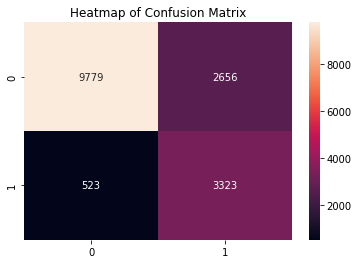

In [115]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()